<a href="https://colab.research.google.com/github/prajwalgotmare/AI_Role_Assignment/blob/main/ROI_Coordinates_and_color_ranges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task:** 

In this Colab notebook, I have used a sample video called "vid_trim" (for faster processing) to perform multiple iterations on the fixed background. The goal was to determine the best coordinates for the region of interest in the video, which we will use in our main Python script. 

Additionally, I have identified the best upper and lower color ranges for four different color balls (yellow, red-orange, blue, and white), which we will also use in the Python script.

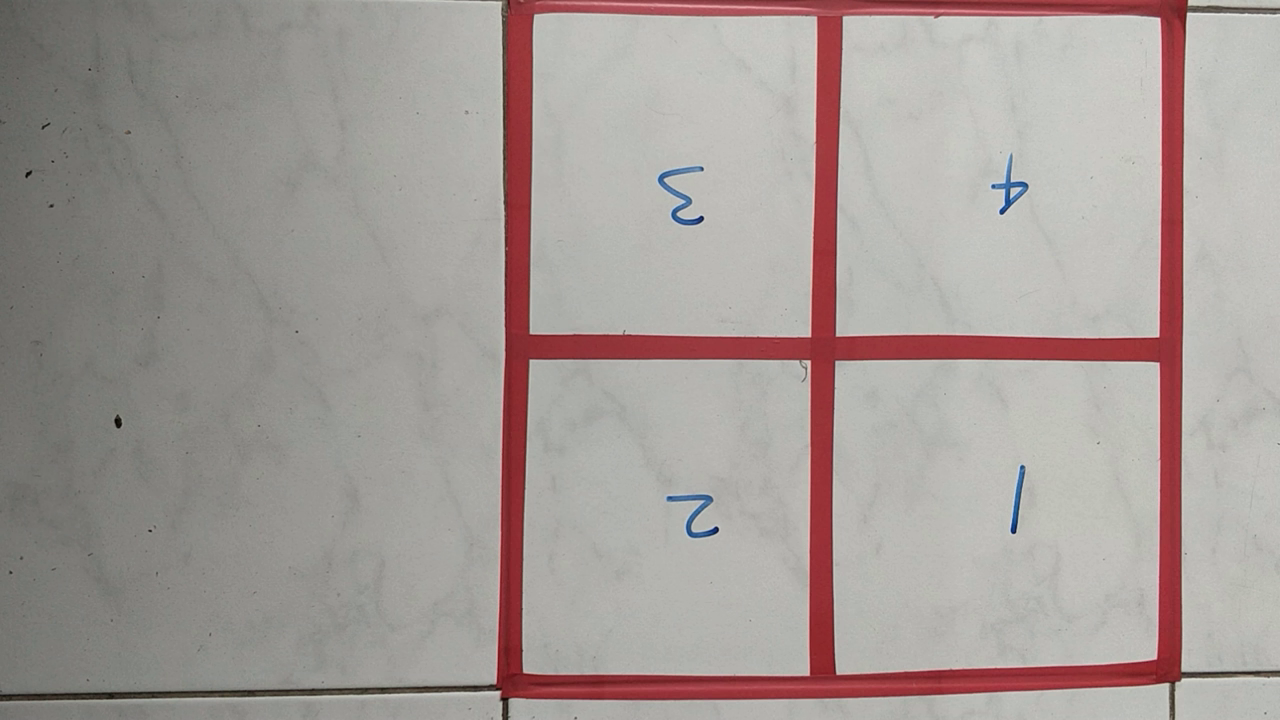

In [1]:
import cv2

# Load the video
video = cv2.VideoCapture("/content/vid_trim.mp4")

# Extract the first frame
ret, frame = video.read()

# Check if the frame was successfully extracted
if ret:
    # Save the first frame as an image
    cv2.imwrite("first_frame.jpg", frame)
    
    # Display the frame
    from google.colab.patches import cv2_imshow
    cv2_imshow(frame)
    cv2.waitKey(0)
else:
    print('Error reading first frame')

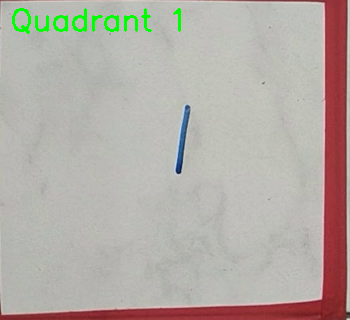

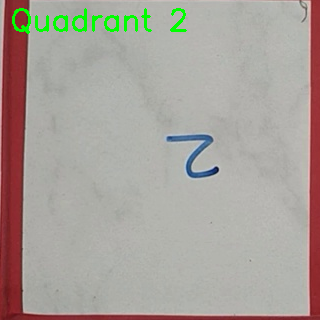

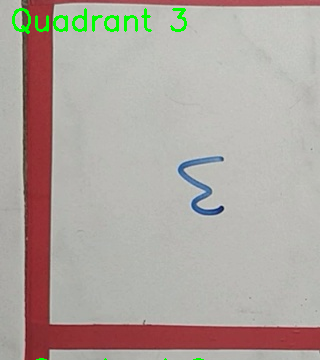

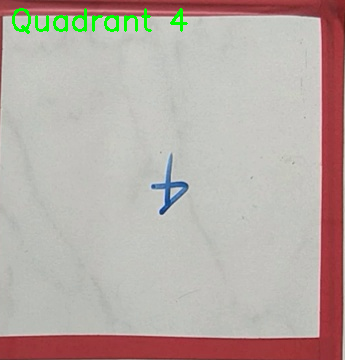

In [2]:
import cv2
from google.colab.patches import cv2_imshow

# Load the video
video = cv2.VideoCapture("/content/vid_trim.mp4")

# Extract the first frame
ret, frame = video.read()

# Check if the frame was successfully extracted
if ret:
    # Save the first frame as an image
    cv2.imwrite("first_frame.jpg", frame)
    
    # Load the image
    img = cv2.imread('/content/first_frame.jpg')

    # Define the ROI coordinates for each quadrant (top-left corner, width, height)
    coordinates = {
        '1': [835, 360, 350, 320],
        '2': [500, 360, 320, 320],
        '3': [480, 10, 320, 360],
        '4': [840, 0, 345, 360],
    }

    # Extract and save each quadrant as a separate image
    for quadrant, coord in coordinates.items():
        x, y, w, h = coord
        roi = img[y:y+h, x:x+w]
        cv2.imwrite(f'template_{quadrant}.jpg', roi)

        # Label the image and display it
        cv2.putText(roi, f'Quadrant {quadrant}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2_imshow(roi)
        print('\n')

    cv2.waitKey(0)
    cv2.destroyAllWindows()

else:
    print('Error reading first frame')


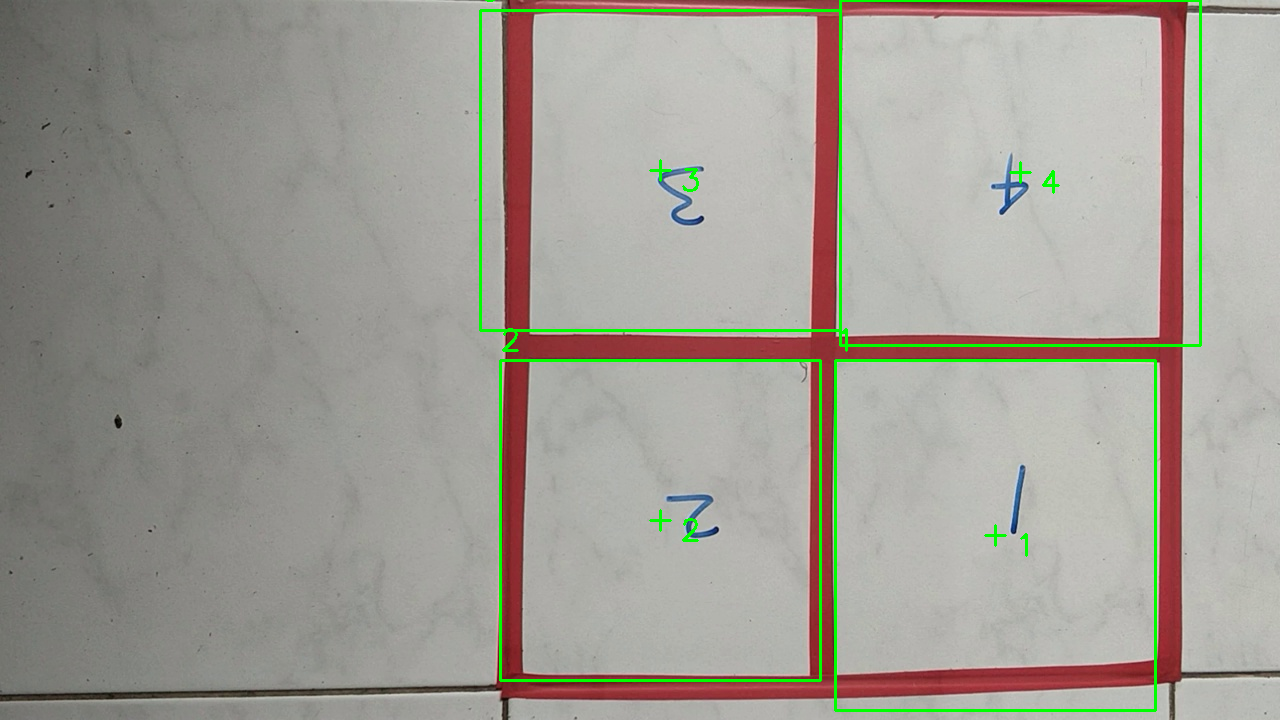

In [3]:
import cv2

# Load the first frame
frame = cv2.imread('first_frame.jpg')

# Define templates for each number
templates = {
    '1': cv2.imread('template_1.jpg'),
    '2': cv2.imread('template_2.jpg'),
    '3': cv2.imread('template_3.jpg'),
    '4': cv2.imread('template_4.jpg')
}

# Iterate over each template and find the location of the number in the frame
for number, template in templates.items():
    result = cv2.matchTemplate(frame, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    x, y = max_loc
    w, h = template.shape[:-1]
    
    # Calculate the center of the bounding box
    cx = x + int(w / 2)
    cy = y + int(h / 2)

    # Draw a bounding box around the number and label it with the corresponding number
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(frame, number, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Draw a plus sign at the center of the bounding box
    cv2.line(frame, (cx - 10, cy), (cx + 10, cy), (0, 255, 0), 2)
    cv2.line(frame, (cx, cy - 10), (cx, cy + 10), (0, 255, 0), 2)
    
    # Display quadrant number near plus sign
    cv2.putText(frame, number, (cx + 20, cy + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display the result
cv2_imshow( frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


### **Conclusion:** 
After conducting multiple iterations, we found the most suitable coordinates for the Region of interest (fixed background) that will be used throughout the video length in our Python script.

    coordinates = {
        '1': [835, 360, 350, 320],
        '2': [500, 360, 320, 320],
        '3': [480, 10, 320, 360],
        '4': [840, 0, 345, 360]
    }

These are the color ranges that work best for the four different balls: yellow, red-orange, blue, and white.

    yellowLower = (20, 100, 100)
    yellowUpper = (30, 255, 255)
    redOrangeLower = (0, 100, 160)
    redOrangeUpper = (10, 255, 255)
    blueLower = (55, 55, 20)
    blueUpper = (95, 100, 100)
    whiteLower = (18, 15, 170)
    whiteUpper = (180, 25, 245)

Both the **ROI co-ordinates** and **color ranges** mentioned above will be used in our main file for getting the best results.


